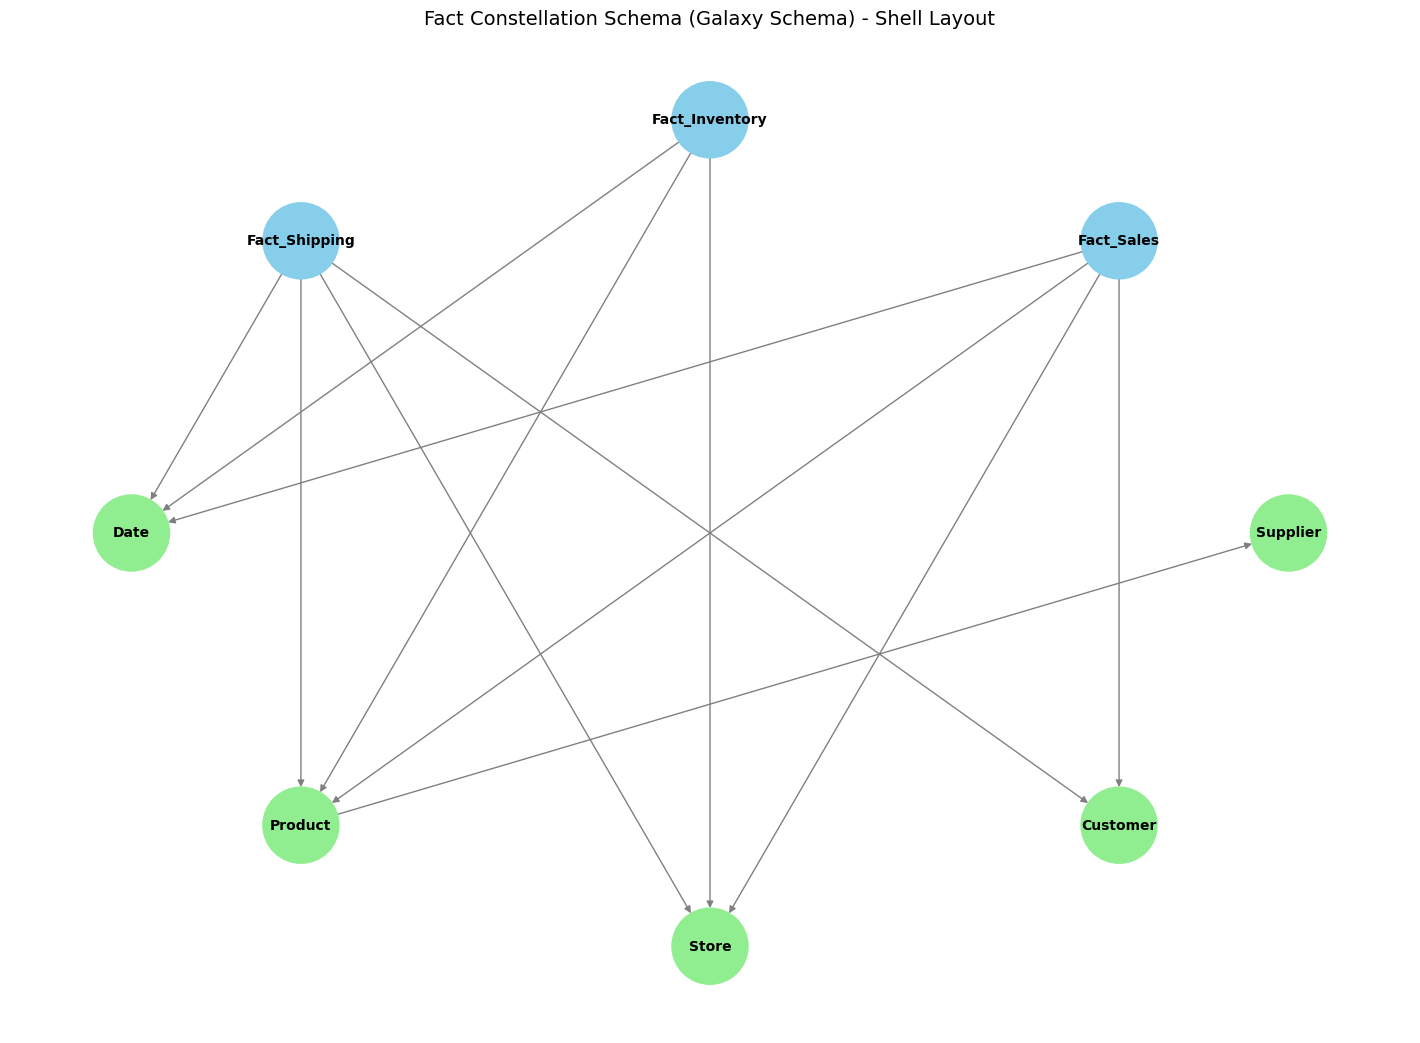

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create the graph
G = nx.DiGraph()

# Dimension and Fact tables
dimensions = ["Date", "Product", "Store", "Customer", "Supplier"]
facts = ["Fact_Sales", "Fact_Inventory", "Fact_Shipping"]

# Attributes for each table
table_attributes = {
    "Date": ["Date_ID", "Day", "Month", "Quarter", "Year"],
    "Product": ["Product_ID", "Product_Name", "Category", "Brand", "Price"],
    "Store": ["Store_ID", "Store_Name", "Location", "Manager"],
    "Customer": ["Customer_ID", "Customer_Name", "Gender", "Age", "Loyalty_Status"],
    "Supplier": ["Supplier_ID", "Supplier_Name", "Contact_Info"],
    "Fact_Sales": ["Sale_ID", "Date_ID", "Product_ID", "Store_ID", "Customer_ID", "Units_Sold", "Revenue"],
    "Fact_Inventory": ["Inventory_ID", "Date_ID", "Product_ID", "Store_ID", "Stock_Level"],
    "Fact_Shipping": ["Shipping_ID", "Date_ID", "Product_ID", "Store_ID", "Customer_ID", "Shipping_Date", "Shipping_Cost"]
}

# Add nodes with attributes
for dim in dimensions:
    G.add_node(dim, type='dimension', attributes=table_attributes[dim])
for fact in facts:
    G.add_node(fact, type='fact', attributes=table_attributes[fact])

# Define relationships
fact_relationships = {
    "Fact_Sales": ["Date", "Product", "Store", "Customer"],
    "Fact_Inventory": ["Date", "Product", "Store"],
    "Fact_Shipping": ["Date", "Product", "Store", "Customer"]
}

for fact, dims in fact_relationships.items():
    for dim in dims:
        G.add_edge(fact, dim)

# Add relationship from Product to Supplier
G.add_edge("Product", "Supplier")

# Use shell layout to minimize overlap
pos = nx.shell_layout(G)

# Assign colors to nodes
colors = ['skyblue' if G.nodes[node]['type'] == 'fact' else 'lightgreen' for node in G.nodes]

# Draw and save the graph
plt.figure(figsize=(14, 10))
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=3000,
        font_size=10, font_weight='bold', edge_color='gray')
plt.title("Fact Constellation Schema (Galaxy Schema) - Shell Layout", fontsize=14)
plt.axis('off')
plt.savefig("fact_constellation_schema_shell_layout.png")
plt.show()

# Print attributes of each table
print("\nTable Attributes:")
for table, attrs in table_attributes.items():
    print(f"{table}:\n  - " + "\n  - ".join(attrs))
